In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
stats=pd.read_csv('../../data/baseball/2015battingstats.csv', sep=';')

In [14]:
print stats.shape
print stats.head()

stats=stats[stats.PA>400]

(639, 30)
   Rk            Name  Age   Tm    G   PA   AB   R    H  2B ...     OPS  OPS+  \
0   1  Fernando Abad*   29  OAK   62    0    0   0    0   0 ...     NaN   NaN   
1   2      Jose Abreu   28  CHW  154  668  613  88  178  34 ...   0.850   135   
2   3     A.J. Achter   26  MIN   11    0    0   0    0   0 ...     NaN   NaN   
3   4  Dustin Ackley*   27  TOT  108  264  238  28   55  11 ...   0.712    97   
4   5  Dustin Ackley*   27  SEA   85  207  186  22   40   8 ...   0.635    78   

    TB  GDP  HBP  SH  SF  IBB  Pos Summary  old  
0    0    0    0   0   0    0            1  old  
1  308   16   15   0   1   11          *3D  old  
2    0    0    0   0   0    0            1  old  
3  102    3    1   3   4    0      784/3D9  old  
4   68    3    1   3   3    0       78/D94  old  

[5 rows x 30 columns]


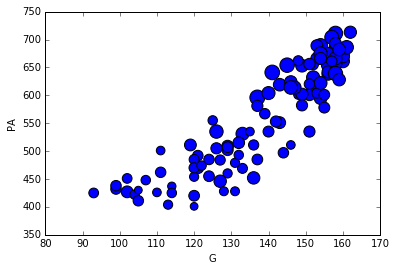

In [15]:
stats.plot.scatter('G', 'PA', s=stats['2B']*5)

In [26]:
stats['agecat']=stats['Age'].map(lambda x: 'young' if x < 30 else 'old')

In [27]:
gb_age=stats.groupby('agecat').mean()
gb_age.head()

,Rk,Age,G,PA,AB,R,H,2B,3B,HR,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
agecat,,,,,,,,,,,,,,,,,,,,,
old,295.875000,33.050000,135.975000,555.175000,494.775000,66.250000,129.800000,25.725000,1.550000,18.400000,...,0.330025,0.430075,0.760150,108.075,213.825000,13.250000,5.125000,0.950000,4.975000,4.025000
young,274.246154,26.123077,139.215385,562.938462,509.476923,67.784615,137.076923,26.692308,3.784615,16.738462,...,0.326600,0.432092,0.758723,107.000,221.553846,11.076923,5.246154,2.215385,4.076923,2.430769


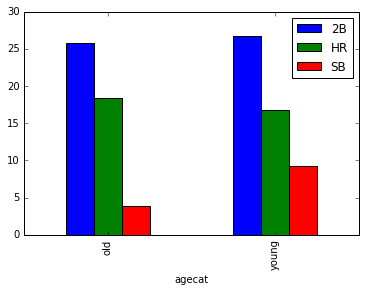

In [28]:
gb_age[['2B','HR','SB']].plot.bar()

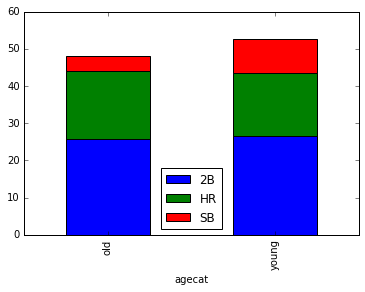

In [29]:
gb_age[['2B','HR','SB']].plot.bar(stacked=True)

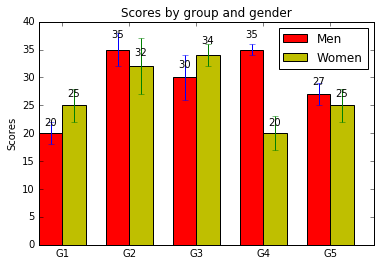

In [1]:
%matplotlib inline

# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='y', yerr=womenStd)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()